In [2]:
import pandas as pd
df=pd.read_csv('train_news.csv')
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('train_news.csv')
group=df.groupby('label')
class_mean=group.mean()
class_stdev=group.std()
print("mean is",class_mean)
print("standard deviation is",class_stdev)
class0_centroid=class_mean.loc[0]
class1_centroid=class_mean.loc[1]
centroid_dist=np.linalg.norm(class0_centroid-class1_centroid)
print("distance between the mean vectors of the classes is",centroid_dist)

mean is          Unnamed: 0            id
label                            
0      10370.473380  10392.644171
1      10428.454144  10406.338711
standard deviation is         Unnamed: 0           id
label                          
0      5969.986084  5982.025154
1      6039.051974  6027.288133
distance between the mean vectors of the classes is 59.57608076231777


C:\Users\madhu\AppData\Local\Temp\ipykernel_91700\2190868859.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_mean=group.mean()
C:\Users\madhu\AppData\Local\Temp\ipykernel_91700\2190868859.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_stdev=group.std()


Mean: 10399.5
Variance: 36053333.25


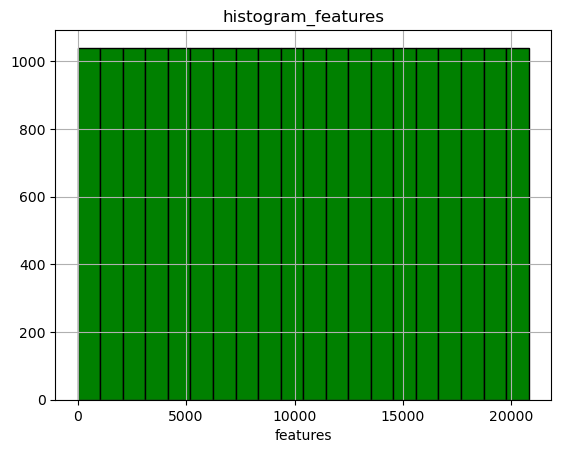

In [4]:
import matplotlib.pyplot as plt
feature=df['id']
no_of_bins=20
hist, bins=np.histogram(feature,bins=no_of_bins)
mean=np.mean(feature)
var=np.var(feature)
plt.hist(feature, bins=no_of_bins,alpha=1,color='green',edgecolor='black')
plt.xlabel('features')
plt.ylabel=('frequency')
plt.title('histogram_features')
plt.grid(True)
print(f"Mean: {mean}")
print(f"Variance: {var}")
plt.show()

In [12]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
text_cols=['headline','written_by','news']
missing=df[text_cols].isnull().sum()
print("missing values in text columns ",missing)
df['com_text']=df[text_cols].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)
print("com_text cols are  ",df['com_text'])
df['headline'].fillna(' ',inplace=True)
df['written_by'].fillna(' ',inplace=True)
df['news'].fillna(' ',inplace=True)
tfidf_vect=TfidfVectorizer(max_features=1000)
tfidf_mat=tfidf_vect.fit_transform(df['com_text'])
tfidf_df=pd.DataFrame(tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names_out())
print(tfidf_df.head())
df=pd.concat([df,tfidf_df],axis=1)
                                    

missing values in text columns  headline       0
written_by     0
news          39
news           0
news           0
news           0
dtype: int64
com_text cols are   0        Ethics Questions Dogged Agriculture Nominee as...
1        U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2        Cotton to House: ’Do Not Walk the Plank and Vo...
3        Paul LePage, Besieged Maine Governor, Sends Co...
4        A Digital 9/11 If Trump Wins Finian Cunningham...
                               ...                        
20795     NeverSurrender No, you'll be a dog licking of...
20796    Albert Pike and the European Migrant Crisis Ri...
20797    Dakota Access Caught Infiltrating Protests to ...
20798    How to Stretch the Summer Solstice - The New Y...
20799    Emory University to Pay for ’100 Percent’ of U...
Name: com_text, Length: 20800, dtype: object


C:\Users\madhu\AppData\Local\Temp\ipykernel_91700\1571805788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news'].fillna(' ',inplace=True)


        000        10       100        11   12        15   16        20  \
0  0.068304  0.000000  0.069799  0.000000  0.0  0.000000  0.0  0.000000   
1  0.000000  0.020328  0.000000  0.047199  0.0  0.049431  0.0  0.022871   
2  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000   
4  0.000000  0.000000  0.000000  0.064278  0.0  0.000000  0.0  0.000000   

       2012  2013  ...  wrong  wrote      year     years  yes       yet  \
0  0.000000   0.0  ...    0.0    0.0  0.010915  0.031301  0.0  0.000000   
1  0.000000   0.0  ...    0.0    0.0  0.015679  0.059946  0.0  0.000000   
2  0.000000   0.0  ...    0.0    0.0  0.000000  0.000000  0.0  0.000000   
3  0.000000   0.0  ...    0.0    0.0  0.000000  0.000000  0.0  0.018067   
4  0.018289   0.0  ...    0.0    0.0  0.000000  0.010205  0.0  0.000000   

       york       you  young      your  
0  0.010435  0.026570    0.0  0.000000  
1  0.014988  0.0

In [13]:
print(df)

       Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                      
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Li

TypeError: 'str' object is not callable

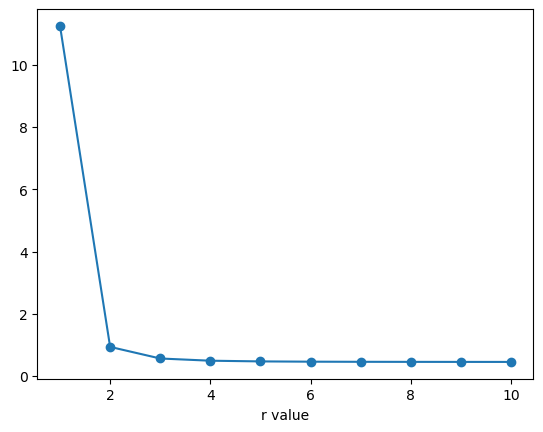

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski
rowindex_1=0
rowindex_2=1
feat_vect1=tfidf_df.iloc[rowindex_1,6:].values
feat_vect2=tfidf_df.iloc[rowindex_2,6:].values
r_value=np.arange(1,11)
distance=[]
for r in r_value:
    dist=minkowski(feat_vect1,feat_vect2,r)
    distance.append(dist)
plt.plot(r_value,distance,marker='o',linestyle='-')
plt.xlabel('r value')
plt.ylabel('minkowski distance')
plt.title('minkowski dist vs r value')
plt.grid(True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Unnamed: 0','id','headline','written_by','news','label','com_text'])
y=df['label'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neighbors=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
knn3_score=neighbors.score(x_test,y_test)
print("accuracy of knn classifier is",knn3_score)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [30]:
predict_label=neighbors.predict(x_test)
print("predicted labels for test vectors is ",predict_label)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [34]:
train_df = pd.DataFrame(x_train, columns=x.columns)
test_df = pd.DataFrame(x_test, columns=x.columns)
train_datatypes = train_df.dtypes
test_datatypes = test_df.dtypes
print("Data Types in Training Set:")
print(train_data_types)
print("\nData Types in Test Set:")
print(test_data_types)
print("training dataset shape",x_train.shape,y_train.shape)
print("test dataset shape",x_test.shape,y_test.shape)

Data Types in Training Set:
000      float64
10       float64
100      float64
11       float64
12       float64
          ...   
yet      float64
york     float64
you      float64
young    float64
your     float64
Length: 3996, dtype: object

Data Types in Test Set:
000      float64
10       float64
100      float64
11       float64
12       float64
          ...   
yet      float64
york     float64
you      float64
young    float64
your     float64
Length: 3996, dtype: object
training dataset shape (14560, 3996) (14560,)
test dataset shape (6240, 3996) (6240,)


In [36]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.metrics import accuracy_score
neighbors=KNeighborsClassifier(n_neighbors=1)
neighbors.fit(x,y)
knn1_score=neighbors.score(x_test,y_test)
predict_label=neighbors.predict(x_test)
x_axis=np.arange(1,12)
y_axis=[]
for i in range(1,12):
    neighbors=KNeighborsClassifier(n_neighbors=i)
    neighbors.fit(x,y)
    y_axis.append(neighbors.score(x_test,y_test))
plt.bar(x_axis,y_axis,color='green')
plt.xlabel('k-values')
plt.ylabel('accuracy')
plt.title("k-value vs accuracy scores")
plt.show()

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [37]:
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.neighbors import KNeighborsClassifier
neighbors=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(x_train,y_train)
prediction_trainset=neighbors.predict(x_train)
prediction_testset=neighbors.predict(x_test)
train_con_matrix=confusion_matrix(y_train,prediction_trainset)
test_con_matrix=confusion_matrix(y_test,prediction_testset)
train_classification=classification_report(y_train,prediction_trainset)
test_classification=classification_report(y_test,prediction_testset)
print("confusion matrix for training dataset ",train_con_matrix)
print("confusion matrix for test dataset ",test_con_matrix)
print("classification report for train set is ",train_classification)
print("classification report for test set is ",test_classification)

AttributeError: 'Flags' object has no attribute 'c_contiguous'